In [ ]:
import pandas as pd
from glob import glob
import os
#載入OS模組
files = glob('C:/Users/User/Desktop/data/*.csv')
# print(files)

path = 'C:/Users/User/Desktop/data/'

all_file_name = os.listdir(path)
#↑獲取當前資料夾名稱然後存成dir_path變數
print(all_file_name)

for i in all_file_name:
    df = pd.read_csv(path + i)
    df['name'] = i.split('.')[0]
    df.to_csv(path + i, index=False)
    
    


In [ ]:
# csv_read_file = pd.read_csv("C:/Users/User/Desktop/monotest/data/聚類结果.csv", encoding="utf-8")

# csv_read_file = csv_read_file.drop(['name'],axis=1)

# csv_read_data = csv_read_file.values.tolist()

# print(csv_read_data[4][1])

# # csv_read_data

# # for row in range(len(csv_read_data)):
# #     print(csv_read_data[row][0], csv_read_data[row][1])

In [ ]:
# import os
# #↑載入OS模組



# dir_path = os.path.dirname('C:/Users/User/Desktop/data/*')
# #↑獲取當前資料夾名稱然後存成dir_path變數
# all_file_name = os.listdir(dir_path)

# for i in all_file_name:
#     i.split('.')[0]
    
# y = [i.split('.')[0] for i in all_file_name]    
# print(y)

# #↑讀取資料夾內所有檔案名稱然後放進all_file_name這個list裡
# #all_file_name = all_file_name.split('.')

# #print(all_file_name)

In [ ]:
df = pd.concat(
    (pd.read_csv(file, usecols=['name','open_time','open','close','volume','high','low']) for file in files), ignore_index=True)
 
print(df)


In [ ]:
cols = df.columns.tolist()                     # 把df的列名称，取出来放到一个list里边。即返回['a', 'b', 'c', 'd', 'e', 'mean']
cols.insert(0, cols.pop(cols.index('name')))   # pop()把mean从cols列表里挖出来，通过位置参数“0”，然后放到第一列。
df_final = df[cols]                            # df按照cols序列，把mean字段放到了第一列

print(df_final)
path = 'C:/Users/User/Desktop/data/'
df_final.to_csv(path +'1newalldata.csv', index=False)

In [1]:
import numpy as np
import csv
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('C:/Users/User/Desktop/diss24kmeans-main/data/1newalldata.csv',usecols=['name','open_time','open','close','low','high','volume'],on_bad_lines='skip')
df.tail()

,name,open_time,open,high,low,close,volume
130084,ZRXUSDT,1664150400000,0.2683,0.2715,0.2593,0.2682,2699807.0
130085,ZRXUSDT,1664236800000,0.2683,0.2811,0.2625,0.2660,4757826.0
130086,ZRXUSDT,1664323200000,0.2660,0.2746,0.2575,0.2671,6995950.0
130087,ZRXUSDT,1664409600000,0.2672,0.2710,0.2614,0.2698,3470136.0
130088,ZRXUSDT,1664496000000,0.2700,0.2718,0.2642,0.2673,2844533.0


In [2]:
df=df.groupby('name').tail(30)


In [3]:
df['change'] = df.groupby('name')['close'].shift(-1)
df = df.dropna()

df['change'] = df['change']-df['open']

In [4]:
std = df.groupby('name')["change"].std().rename("std").reset_index()



high = df.groupby('name')["high"].max().rename("high").reset_index()


low = df.groupby('name')["low"].min().rename("low").reset_index()

In [5]:
vol = df.groupby('name')["volume"].mean().rename("vol").reset_index()

In [6]:
df = pd.merge(std,high, on='name')

In [ ]:
df = pd.merge(df,low, on='name')
df

In [7]:
df = pd.merge(df,vol, on='name')

In [8]:
df

,name,std,high,vol
0,1INCHUSDT,0.030941,0.739000,5.269226e+06
1,1newalldata,0.014797,0.332100,3.926644e+06
2,AAVEUSDT,3.976538,97.000000,1.264031e+05
3,ADADOWNUSDT,0.000422,0.005043,4.094849e+08
4,ADAUPUSDT,0.111665,1.357000,1.892541e+06
...,...,...,...,...
199,YFIUSDT,614.083808,11380.000000,6.265040e+02
200,ZECUSDT,3.164524,66.900000,7.561084e+04
201,ZENUSDT,0.879873,17.250000,9.551513e+04
202,ZILUSDT,0.001481,0.038460,2.030964e+08


In [9]:
print ("Shape Of The Before Ouliers: ",df.shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(df['std'],75) - np.percentile(df['std'],25)
#outlier = Q3 + n*IQR 
df=df[df['std'] < np.percentile(df['std'],75)+n*IQR]
#outlier = Q1 - n*IQR 
df=df[df['std'] > np.percentile(df['std'],25)-n*IQR]
print ("Shape Of The After Ouliers: ",df.shape)

Shape Of The Before Ouliers:  (204, 4)
Shape Of The After Ouliers:  (169, 4)


In [10]:
print ("Shape Of The Before Ouliers: ",df.shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(df['vol'],75) - np.percentile(df['std'],25)
#outlier = Q3 + n*IQR 
df=df[df['std'] < np.percentile(df['vol'],75)+n*IQR]
#outlier = Q1 - n*IQR 
df=df[df['std'] > np.percentile(df['vol'],25)-n*IQR]
print ("Shape Of The After Ouliers: ",df.shape)

Shape Of The Before Ouliers:  (169, 4)
Shape Of The After Ouliers:  (169, 4)


In [11]:
df

,name,std,high,vol
0,1INCHUSDT,0.030941,0.739000,5.269226e+06
1,1newalldata,0.014797,0.332100,3.926644e+06
3,ADADOWNUSDT,0.000422,0.005043,4.094849e+08
4,ADAUPUSDT,0.111665,1.357000,1.892541e+06
5,ADAUSDT,0.022162,0.524200,1.533948e+08
...,...,...,...,...
195,XRPUSDT,0.032041,0.559000,5.197348e+08
196,XTZUSDT,0.074038,1.757000,2.766750e+06
197,XVSUSDT,0.197150,5.520000,1.792835e+05
202,ZILUSDT,0.001481,0.038460,2.030964e+08


In [12]:
def MinMaxNormalization(test_data):
    return test_data.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)))
df[['std','high','vol']] = MinMaxNormalization(df[['std','high','vol']])

In [ ]:
from sklearn import preprocessing
#建立RobustScaler物件
zscore = preprocessing.RobustScaler()
# 資料標準化
df[['std','high','vol']]  = zscore.fit_transform(df[['std','high','vol']])

In [13]:
path = 'C:/Users/User/Desktop/diss24kmeans-main/data/'

In [14]:
from sklearn.cluster import KMeans
import os
# 设置为兩个聚类中心
Kmeans = KMeans(n_clusters=2)# 分幾群
# 训练模型
Kmeans.fit(df[['std','high','vol']])
Kmeans.cluster_centers_ # 聚类中心點顏色不一樣
Kmeans.labels_ # 聚类结果
out_file = pd.DataFrame(columns=['name','std','high','vol'])
out_file[['name','std','high','vol']] = df
out_file['聚類结果'] = Kmeans.labels_
out_file.to_csv(os.path.join(path,'聚類结果.csv'),index=False,encoding="utf_8_sig")

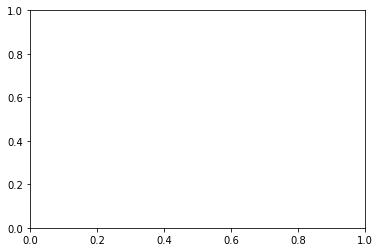

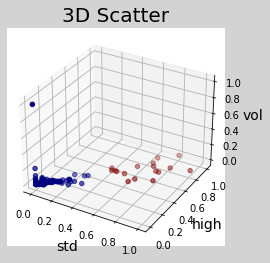

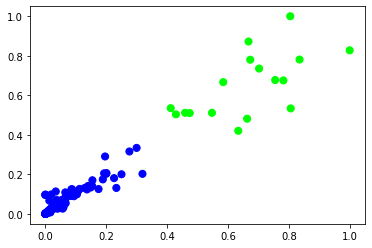

In [15]:
import matplotlib.pyplot as plt
label_pred = Kmeans.labels_ #获取聚类标签
centroids = Kmeans.cluster_centers_ #获取聚类中心
inertia = Kmeans.inertia_ # 获取聚类准则的总和
mark = ['or', '^b', '+g', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
#这里'or'代表中的'o'代表画圈，'r'代表颜色为红色，后面的依次类推
j = 0 
for i in label_pred:
    plt.plot([df[j:j+1]["std"]], [df[j:j+1]['high']], mark[i], markersize = 5)
    j +=1
plt.title('std-high')
plt.xlabel('std')
plt.ylabel('high')
plt.savefig(path+'1std-high.png',dpi=100,bbox_inches='tight')
plt.cla()
j = 0 
# plt.show()
for i in label_pred:
    plt.plot([df[j:j+1]["std"]], [df[j:j+1]['vol']], mark[i], markersize = 5)
    j +=1
plt.title('std-vol')
plt.xlabel('std')
plt.ylabel('vol)')
plt.savefig(path+'1std-vol.png',dpi=100,bbox_inches='tight')
plt.cla()
j = 0 
for i in label_pred:
    plt.plot([df[j:j+1]["high"]], [df[j:j+1]['vol']], mark[i], markersize = 5)
    j +=1
plt.title('high-vol')
plt.xlabel('high')
plt.ylabel('vol')
plt.savefig(path+'1high-vol.png',dpi=100,bbox_inches='tight')
plt.cla()
plt.figure("3D Scatter", facecolor="lightgray")
ax3d = plt.subplot(projection="3d")  # 创建三维坐标

plt.title('3D Scatter', fontsize=20)
ax3d.set_xlabel('std', fontsize=14)
ax3d.set_ylabel('high', fontsize=14)
ax3d.set_zlabel('vol', fontsize=14)
plt.tick_params(labelsize=10)
ax3d.scatter(df["std"], df["high"], df['vol'], s=20, c = label_pred,cmap="jet", marker="o")
plt.show()

plt.scatter(df["std"],df["high"],c=label_pred, s=50, cmap='brg')
ax3d.figure.savefig(path+'3d.png')

In [2]:
import pandas as pd 
df1= pd.read_csv('C:/Users/User/Desktop/diss24kmeans-main/data/聚類结果.csv')
df1

,name,std,high,vol,聚類结果
0,1INCHUSDT,0.064684,0.071598,0.000188,0
1,1newalldata,0.030930,0.032169,0.000139,0
2,ADADOWNUSDT,0.000875,0.000477,0.014743,0
3,ADAUPUSDT,0.233460,0.131482,0.000066,0
4,ADAUSDT,0.046329,0.050784,0.005521,0
...,...,...,...,...,...
164,XRPUSDT,0.066982,0.054156,0.018713,0
165,XTZUSDT,0.154790,0.170242,0.000098,0
166,XVSUSDT,0.412190,0.534878,0.000004,1
167,ZILUSDT,0.003089,0.003715,0.007311,0


In [ ]:
model.save(path+'kmeans_model.h5')

In [ ]:
from sklearn import preprocessing
X =df[['std','Allvolume','openmean','closemean']]
X = np.array(X)
zscore = preprocessing.StandardScaler()
X = zscore.fit_transform(X)

In [ ]:
#print(df.loc[:,'std'].max())

In [ ]:
#df = df.drop(df[df['std']==2266.6784666410404].index)
#df

In [ ]:
#print(df.loc[:,'std'].max())

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs


#plt.scatter(X['std'],s=50)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X)
y_kmeans = kmeans.predict(X)

centroids = kmeans.cluster_centers_

print('centroids: {}'.format(centroids))

print('------------')
print('prediction on each data: {}'.format(y_kmeans))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



#X = make_blobs(n_samples=203,centers=2,
#                cluster_std=0.60, random_state=0)

#y = np.array(X[0],dtype=float)
#print(X[1])

#print(X[1])


plt.scatter(X[:,2],X[:,3],c=y_kmeans, s=50, cmap='brg')